In [14]:
import pandas as pd
import json 
import numpy

# fname = 'chatelet'
# fcode = 'cha4'
fname = 'auber'
fcode = 'auba'
# fname = 'franklin-d-roosevelt'
# fcode = 'fra1'

dateTimeArr = []
nameArr = ['c2'+fcode,'t'+fcode,'hy'+fcode,'10'+fcode,'n2'+fcode,'no'+fcode,'dateheure'] # auber
dispArr = ['CO2','temp','humidity','PM10','NO2','NO','dateTime']
bigDataArr = []



with open('qualite-de-lair-mesuree-dans-la-station-' + fname + '.json') as json_data:
    jsonData = json.load(json_data)
    
    for i in jsonData:        
        
        fields = i['fields']        
        tempArr = []
        
        for j in range(len(nameArr)-1):            
            ent = numpy.nan
            if nameArr[j] in fields:
                ent = fields[nameArr[j]]
            tempArr.append(ent)
            
        j = len(nameArr)-1 # special processing for dateTime
        ent = numpy.nan
        if nameArr[j] in fields:
                ent = fields[nameArr[j]]
                ent = ent[0:19]
                ent = ent.replace("T"," ")
                #print(ent)
        tempArr.append(ent)
            
        bigDataArr.append(tempArr)
        
# transpose
bigDataArr = [[bigDataArr[j][i] for j in range(len(bigDataArr))] for i in range(len(bigDataArr[0]))] 
        
with open('airQuality-' + fname + '.json', 'w') as outfile:
    json.dump(bigDataArr, outfile)
    
# c2cha4 = CO2
# tcha4 = TEMP
# hych4 = humidity
# 10cha4 = PM10
# n2cha4 = NO2
# nocha4 = NO
# dateheure = dateTime

# turn into dataframe for PROPHET
import pandas as pd

dArr = list(range(2,6))

dInd = 3
    
d = None
df = None
m = None
forecast = None

dnumber = dInd

d = {'ds': bigDataArr[6],'y': bigDataArr[dnumber]}
dname = dispArr[dnumber]
df = pd.DataFrame(data=d)

# start playing around with PROPHET
from fbprophet import Prophet

df.ds = pd.to_datetime(df.ds) # convert into datetime

df1 = df

In [15]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

data = pd.read_csv("groundLevel/20120901_20190916-PM10_auto.csv",sep=';') # test PM10 first 

dataLegend = data.loc[0] # remove legend (unit) from first row
data = data.loc[1:]

hourArr = []
dateArr = []

data.head()

for i in data.heure:
    hr = int(i) - 1 # to turn 24 into 0
    if hr==-1:      # to turn 24 into 0
        hr = 23     # to turn 24 into 0
    hourString = str(hr)
    hourString = hourString.zfill(2) + ":59:00"  # to turn 24 into 0
    hourArr.append(hourString)
for i in data.date:
    date = i[6:10] + "-" + i[3:5] + "-" + i[0:2] + " "
    dateArr.append(date)    

#tempData = data.ELYS
#tempData = data.ELYS.tolist()
#print(type(tempData))
#tempData.replace('n/d',np.nan)
#print(tempData)

d = {'date': dateArr,'hour': hourArr, 'y': data.ELYS} # choose data from Opera (close to Auber)

df = pd.DataFrame(data=d)
df['ds'] = df['date'] + df['hour']
del df['date']
del df['hour']
columnsTitles=['ds','y']
df=df.reindex(columns=columnsTitles)
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'] + pd.Timedelta('1 min') # to turn 24 into 0
df['y'] = df['y'].replace('n/d', 'nan') # turn d/s into NaN

df2 = df
test = df2.y
test = test.astype(float)
df2.y = test

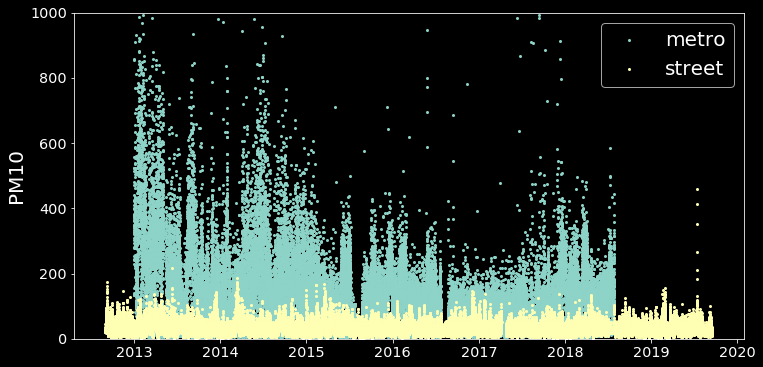

In [49]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')
#from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']
 
plt.figure(figsize=(12, 6))
plt.scatter(df1.ds,df1.y,4)
plt.scatter(df2.ds,df2.y,4)
plt.ylabel('PM10',fontsize=20)
plt.legend(['metro','street'],fontsize=20)
plt.savefig('pickleToData_plotComparison.png',transparent=True)
plt.ylim(0, 1000)
plt.savefig('pickleToData_plotComparison_zoom.png',transparent=True)